In [1]:
# The notebook is being written to support my article on Insurance Fraud. The purpose of this notebook is to leverage the 
# sample dataset uploaded on Kaggle and perform ML to identify and predict fraudulent claims.

# The article link is - 


In [2]:
# Importing basic libraries
import os 
os.chdir("C:/Users/rp161/Documents/Raj/Personal/DS Projects/Fraud Detection Insurance")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import sklearn

# use following command to download shap & eli5
# conda install -c conda-forge shap
# conda install -c conda-forge eli5

In [3]:
# Importing libraries for Visualization 
import plotly
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

import plotly.figure_factory as ff
import plotly_express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

!pip install joypy
import joypy

In [4]:
# Import libraries for data processing & modeling

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
C:\Users\rp161\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\rp161\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\rp161\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\rp161\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of nu

In [5]:
train = pd.read_csv('insurance_claims.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)
train.head()
# train.shape
# train.info()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
train.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
# Check for missing data 
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio


In [8]:
# Unique values in each variables
train.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

A casual look of data will reveal that few features have '?' as values. For example Collision_type has 178 such values which need to be replaced 

In [9]:
train = train.replace('?',np.NaN)
train.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

Let's perform the missing value treatment

In [10]:
# Replace the '?' with mode of collision_type feature as it is categorical and we are unaware of the type.
train['collision_type'].fillna(train['collision_type'].mode()[0], inplace = True)

# Replace missing information as 'No' for property_damage. Feature can have only 2 possibles values. Either Yes or No. 
# If information is nor available we will assume it was not reported.
train['property_damage'].fillna('NO', inplace = True)

# USe the assumption above to replace missing information as 'No' for police_report_available
train['police_report_available'].fillna('NO', inplace = True)

train.isnull().any().any()

False

Data Visualization

In [11]:
# Let's start with some basic plots to analyze relationship between different features
fig = px.scatter(train, x = 'months_as_customer', y = 'age', color = 'fraud_reported', marginal_x = 'rug',
                 marginal_y = 'histogram')
fig.show()

The average months_as_customer is around 200. We can see that recency is linked with frauds here. Let's analyze this with policy_annual_premium..

ahhh not that conclusive!!!

In [12]:
fig = px.scatter(train, x = 'months_as_customer', y = 'policy_annual_premium', color = 'fraud_reported',
                 marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [13]:
fig = px.scatter(train, x = 'months_as_customer', y = 'total_claim_amount', color = 'fraud_reported', marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

Let's see how Total Claim, Injury Claim, Property Claim, and Vehicle Claim are related with fraud_reported

In [14]:
fig = px.scatter_matrix(train, dimensions=["total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"], color = "fraud_reported")
fig.show()

In [15]:
!pip install joypy
import joypy

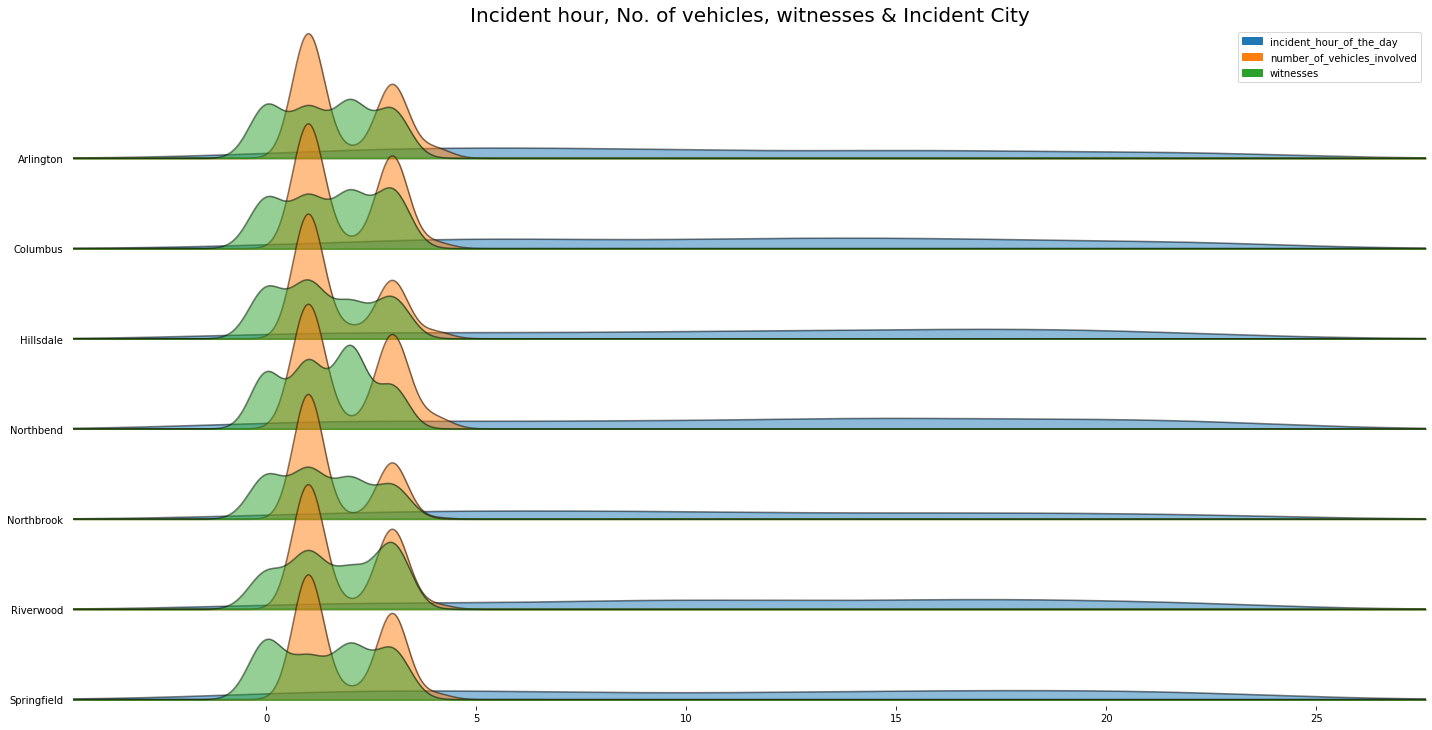

In [16]:
fig, axes = joypy.joyplot(train,
                         column = ['incident_hour_of_the_day','number_of_vehicles_involved', 'witnesses'],
                         by = 'incident_city',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.5, 
                         legend = True)

plt.title('Incident hour, No. of vehicles, witnesses & Incident City', fontsize = 20)
plt.show()

let's encode the fraud reported to numerical values for additional charts

In [17]:
# let's encode the fraud reported to numerical values
train['fraud_reported'] = train['fraud_reported'].replace(('Y','N'),(1,0))

,fraud_reported
insured_sex,
FEMALE,537
MALE,463


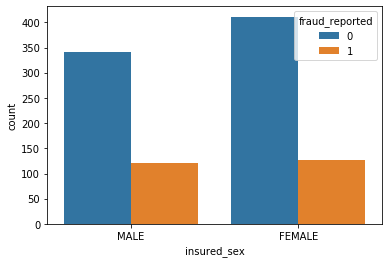

In [18]:
# Count the fraudulent transactions by gender
ax = sns.countplot(x="insured_sex", hue="fraud_reported", data=train)

# Analyze fraudulent transactions by gender
train[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_sex,
MALE,0.261339
FEMALE,0.234637


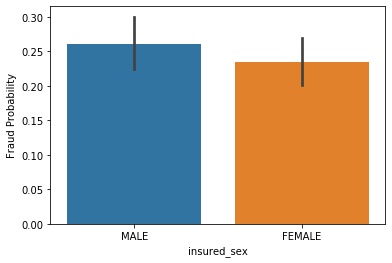

In [19]:
# Analyze the Probability of fraud by Gender
g = sns.barplot(x="insured_sex",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).mean().sort_values(by='fraud_reported', ascending=False)

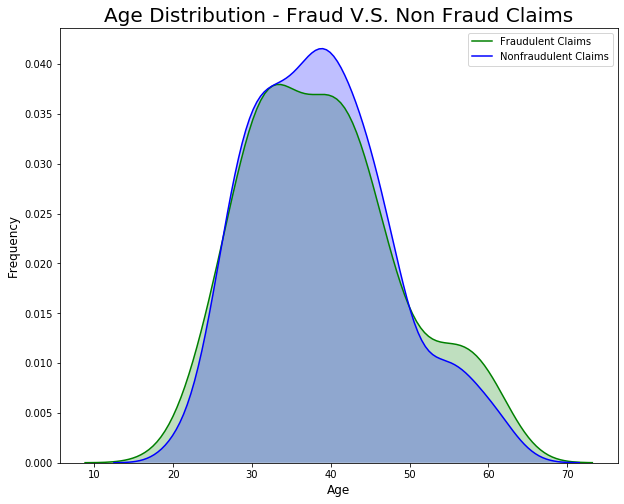

In [20]:
# Let's explore the distribution of age by response variable (Fraud Reported)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['fraud_reported'] == 1),'age'] , color='g',shade=True, label='Fraudulent Claims')
axis = sns.kdeplot(train.loc[(train['fraud_reported'] == 0),'age'] , color='b',shade=True,label='Nonfraudulent Claims')
plt.title('Age Distribution - Fraud V.S. Non Fraud Claims', fontsize = 20)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

,fraud_reported
insured_education_level,
JD,161
High School,160
Associate,145
MD,144
Masters,143
PhD,125
College,122


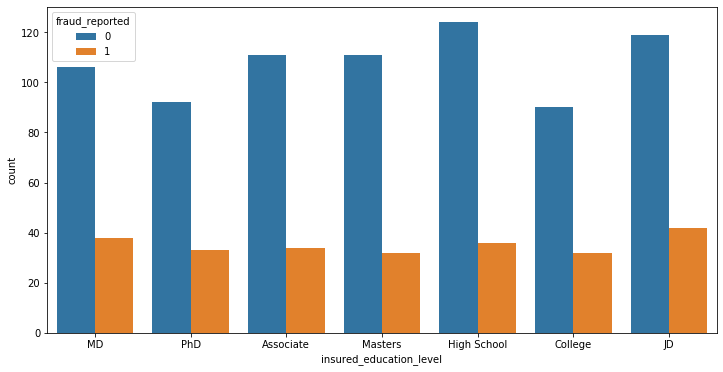

In [21]:
# Count the fraudulent transactions by insured_education_level
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_education_level", hue="fraud_reported", data=train)

# Analyze the fraudulent transactions by insured_education_level
train[["insured_education_level", "fraud_reported"]].groupby(['insured_education_level']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_education_level,
PhD,0.264000
MD,0.263889
College,0.262295
JD,0.260870
Associate,0.234483
High School,0.225000
Masters,0.223776


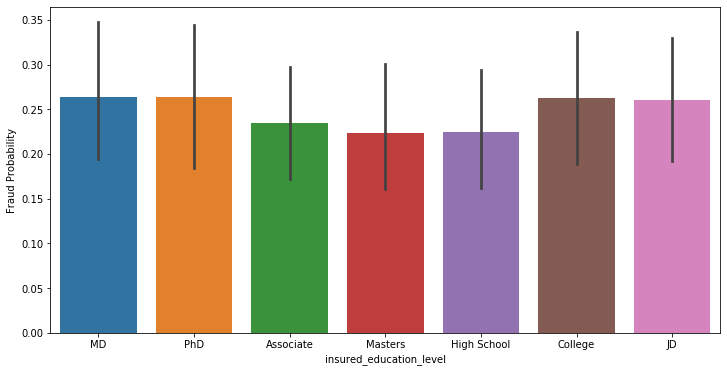

In [22]:
# Analyze the Probability of fraud by education level
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="insured_education_level",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["insured_education_level", "fraud_reported"]].groupby(['insured_education_level']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_relationship,
own-child,183
other-relative,177
not-in-family,174
husband,170
wife,155
unmarried,141


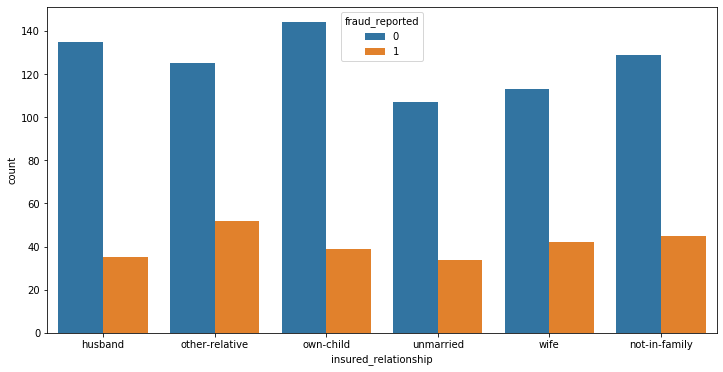

In [23]:
# Count the fraudulent transactions by insured_relationship
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_relationship", hue="fraud_reported", data=train)

# Analyze the fraudulent transactions by insured_relationship
train[["insured_relationship", "fraud_reported"]].groupby(['insured_relationship']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_relationship,
other-relative,0.293785
wife,0.270968
not-in-family,0.258621
unmarried,0.241135
own-child,0.213115
husband,0.205882


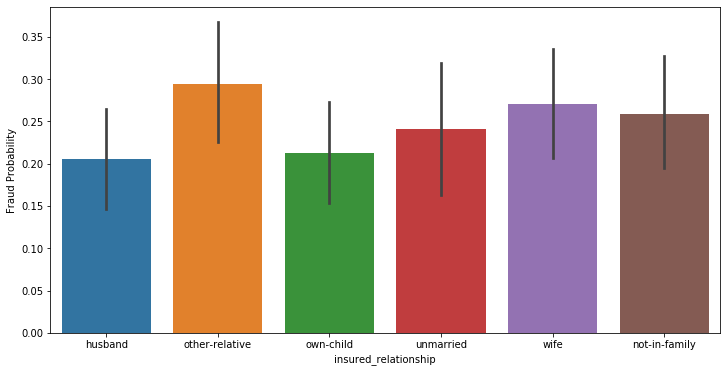

In [24]:
# Analyze the Probability of fraud by insured_relationship
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="insured_relationship",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["insured_relationship", "fraud_reported"]].groupby(['insured_relationship']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_type,
Single Vehicle Collision,0.290323
Multi-vehicle Collision,0.272076
Parked Car,0.095238
Vehicle Theft,0.085106


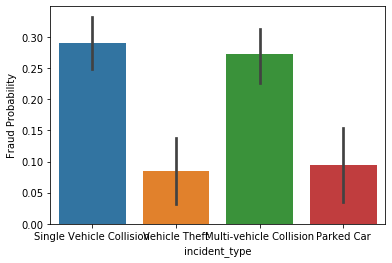

In [25]:
# Analyze the Probability of fraud by incident_type

g = sns.barplot(x="incident_type",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["incident_type", "fraud_reported"]].groupby(['incident_type']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
collision_type,
Front Collision,0.275591
Side Collision,0.253623
Rear Collision,0.227660


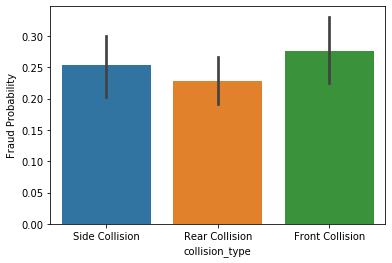

In [26]:
# Analyze the Probability of fraud by collision_type
g = sns.barplot(x="collision_type",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["collision_type", "fraud_reported"]].groupby(['collision_type']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_severity,
Major Damage,0.605072
Total Loss,0.128571
Minor Damage,0.107345
Trivial Damage,0.066667


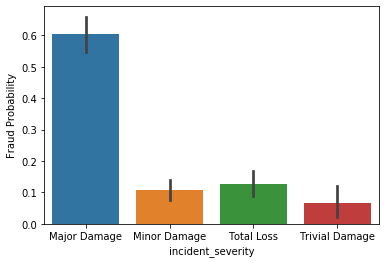

In [27]:
# Analyze the Probability of fraud by incident_severity

g = sns.barplot(x="incident_severity",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["incident_severity", "fraud_reported"]].groupby(['incident_severity']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_state,
OH,0.434783
NC,0.309091
SC,0.294355
PA,0.266667
VA,0.227273
NY,0.221374
WV,0.179724


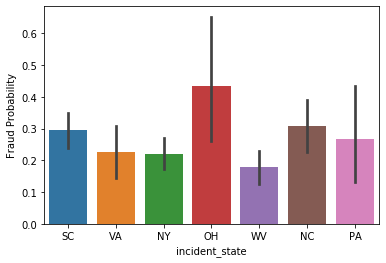

In [28]:
# Analyze the Probability of fraud by incident_state

g = sns.barplot(x="incident_state",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["incident_state", "fraud_reported"]].groupby(['incident_state']).mean().sort_values(by='fraud_reported', ascending=False)

In [29]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = train, x_column = 'policy_annual_premium', y_column = 'total_claim_amount',
                    bubble_column = 'fraud_reported', time_column = 'auto_year', size_column = 'months_as_customer',
                    color_column = 'fraud_reported', x_title = "Annual Policy Premium", y_title = "Total Claim Amount",
                    title = 'Total Claim Amount, Annual Premium and Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

,fraud_reported
auto_make,
Mercedes,0.338462
Ford,0.305556
Audi,0.304348
Volkswagen,0.279412
BMW,0.277778
Chevrolet,0.276316
Honda,0.254545
Dodge,0.250000
Suburu,0.237500


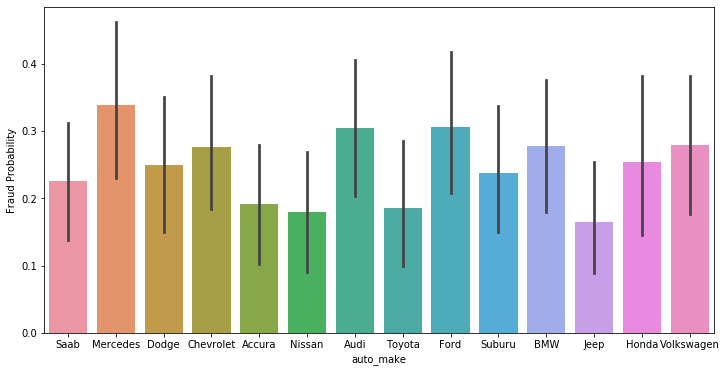

In [30]:
# Analyze the Probability of fraud by incident_state
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="auto_make",y="fraud_reported",data=train)
g = g.set_ylabel("Fraud Probability")
train[["auto_make", "fraud_reported"]].groupby(['auto_make']).mean().sort_values(by='fraud_reported', ascending=False)

Data Processing

In [31]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24] 
catg = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
train['incident_period'] = pd.cut(train.incident_hour_of_the_day, bins, labels=catg).astype(object)
train[['incident_hour_of_the_day', 'incident_period']].head(20)

,incident_hour_of_the_day,incident_period
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [32]:
#Transforming some numerical variables that are really categorical
train['number_of_vehicles_involved'] = train['number_of_vehicles_involved'].apply(str)
train['witnesses'] = train['witnesses'].apply(str)
train['bodily_injuries'] = train['bodily_injuries'].apply(str)

In [33]:
dummies = pd.get_dummies(train[['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
                                'insured_hobbies', 'insured_relationship', 'incident_type',
                                'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                                'incident_city', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
                                'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'incident_period']])

dummies.head(5)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,property_damage_NO,property_damage_YES,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,incident_period_afternoon,incident_period_early_morning,incident_period_evening,incident_period_fore-noon,incident_period_morning,incident_period_night,incident_period_past_midnight
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,

In [34]:
#let's drop unnecessary variables

train = train.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 
                              'incident_location', 'auto_year', 'incident_hour_of_the_day', 'policy_state', 
                              'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                              'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
                              'authorities_contacted', 'incident_state', 'incident_city', 'number_of_vehicles_involved',
                              'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
                              'auto_make', 'auto_model', 'incident_period'])

In [35]:
x = pd.concat([dummies, train], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 169 entries, policy_state_IL to fraud_reported
dtypes: float64(1), int64(11), uint8(157)
memory usage: 247.2 KB


In [36]:
x_unscaled = x.iloc[:, 0:-1]  # predictor variables
y = x.iloc[:, -1]  # target variable

In [37]:
# let's split the dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_unscaled, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 168)
Shape of x_test : (200, 168)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 687 to 684
Columns: 168 entries, policy_state_IL to vehicle_claim
dtypes: float64(1), int64(10), uint8(157)
memory usage: 197.7 KB


In [39]:
# standardize for easy computing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
Y_train= y_train

#Y_train= y

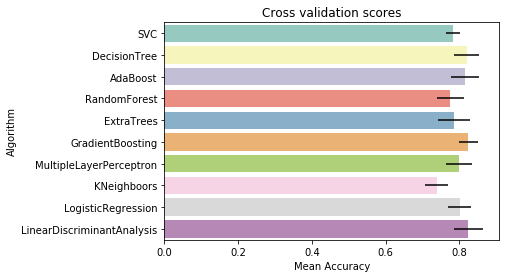

In [40]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling differents algorithms. Thanks Yassine for this great piece of code. 

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train , scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Model Evaluation

Evaluating multiple models using GridSearch optimization method.

In [41]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 936 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   12.5s finished


0.82875

In [42]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.7min finished


0.79

In [43]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.0min finished


0.78

In [44]:
# Gradient boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]}

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   52.9s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.5min finished


0.7975

In [45]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.4min finished


0.835

Training Accuracy:  0.9475
Testing Accuarcy:  0.83
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.79      0.54      0.65        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.83      0.83      0.82       200



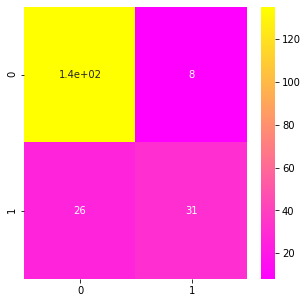

In [46]:
y_pred_rf = gsSVMC.predict(x_test)
print("Training Accuracy: ", gsSVMC.score(X_train, Y_train))
print('Testing Accuarcy: ', gsSVMC.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

Applying Over Sampling Techniques Using SMOTE


In [47]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(x_unscaled, y.values.ravel())
print("Shape of x_resample :",x_resample.shape)
print("Shape of y_resample :",y_resample.shape)

Shape of x_resample : (1506, 168)
Shape of y_resample : (1506,)


In [48]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print("Shape of x_train2 :", x_train2.shape)
print("Shape of y_train2 :", y_train2.shape)
print("Shape of x_test2 :", x_test2.shape)
print("Shape of y_test2 :", y_test2.shape)

Shape of x_train2 : (1204, 168)
Shape of y_train2 : (1204,)
Shape of x_test2 : (302, 168)
Shape of y_test2 : (302,)


In [49]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  3.0min finished


Training Accuracy:  1.0
Testing Accuarcy:  0.8543046357615894
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       154
           1       0.89      0.80      0.84       148

    accuracy                           0.85       302
   macro avg       0.86      0.85      0.85       302
weighted avg       0.86      0.85      0.85       302



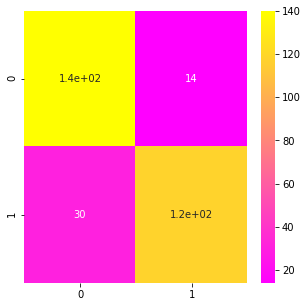

In [50]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(x_train2,y_train2)

y_pred_rf = gsSVMC.predict(x_test2)
print("Training Accuracy: ", gsSVMC.score(x_train2, y_train2))
print('Testing Accuarcy: ', gsSVMC.score(x_test2, y_test2))

# making a classification report
cr = classification_report(y_test2,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test2, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()


As we can see oversampling using SMOTE helped in improving the predictions all the way to almost 85.4% in test dataset.  